In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors_parsed'],
                    200000)

In [3]:
import networkx as nx 
# 创建无向图
G = nx.Graph()

# 只用五篇论文进行构建
for row in data.iloc[:500].itertuples():
    authors = row[2]
    print(authors)
    authors = [' '.join(x[:-1]) for x in authors]
    print(authors)
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点
    print(G)

[['Balázs', 'C.', ''], ['Berger', 'E. L.', ''], ['Nadolsky', 'P. M.', ''], ['Yuan', 'C. -P.', '']]
['Balázs C.', 'Berger E. L.', 'Nadolsky P. M.', 'Yuan C. -P.']

[['Streinu', 'Ileana', ''], ['Theran', 'Louis', '']]
['Streinu Ileana', 'Theran Louis']

[['Pan', 'Hongjun', '']]
['Pan Hongjun']

[['Callan', 'David', '']]
['Callan David']

[['Abu-Shammala', 'Wael', ''], ['Torchinsky', 'Alberto', '']]
['Abu-Shammala Wael', 'Torchinsky Alberto']

[['Pong', 'Y. H.', ''], ['Law', 'C. K.', '']]
['Pong Y. H.', 'Law C. K.']

[['Corichi', 'Alejandro', ''], ['Vukasinac', 'Tatjana', ''], ['Zapata', 'Jose A.', '']]
['Corichi Alejandro', 'Vukasinac Tatjana', 'Zapata Jose A.']

[['Swift', 'Damian C.', '']]
['Swift Damian C.']

[['Harvey', 'Paul', ''], ['Merin', 'Bruno', ''], ['Huard', 'Tracy L.', ''], ['Rebull', 'Luisa M.', ''], ['Chapman', 'Nicholas', ''], ['Evans', 'Neal J.', 'II'], ['Myers', 'Philip C.', '']]
['Harvey Paul', 'Merin Bruno', 'Huard Tracy L.', 'Rebull Luisa M.', 'Chapman Nicholas', 'Ev

['Ogren M.', 'Heiselberg H.']

[['Laloë', 'Franck', '', 'LKB - Lhomond'], ['Mullin', 'William J.', '', 'UMASS']]
['Laloë Franck ', 'Mullin William J. ']

[['Eisenbeiss', 'T.', ''], ['Seifahrt', 'A.', ''], ['Mugrauer', 'M.', ''], ['Schmidt', 'T. O. B.', ''], ['Neuhaeuser', 'R.', ''], ['Roell', 'T.', '']]
['Eisenbeiss T.', 'Seifahrt A.', 'Mugrauer M.', 'Schmidt T. O. B.', 'Neuhaeuser R.', 'Roell T.']

[['Donini', 'A.', ''], ['Maltoni', 'M.', ''], ['Meloni', 'D.', ''], ['Migliozzi', 'P.', ''], ['Terranova', 'F.', '']]
['Donini A.', 'Maltoni M.', 'Meloni D.', 'Migliozzi P.', 'Terranova F.']

[['Flanagan', 'Eanna E.', ''], ['Hinderer', 'Tanja', '']]
['Flanagan Eanna E.', 'Hinderer Tanja']

[['Troubetzkoy', 'Serge', '', 'CPT, Iml, Frumam']]
['Troubetzkoy Serge ']

[['Kozlov', 'G. G.', '']]
['Kozlov G. G.']

[['Kaiser', 'Marcus', ''], ['Martin', 'Robert', ''], ['Andras', 'Peter', ''], ['Young', 'Malcolm P.', '']]
['Kaiser Marcus', 'Martin Robert', 'Andras Peter', 'Young Malcolm P.']

[['Hendy

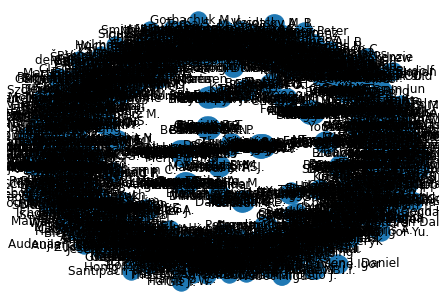

In [4]:
# 将作者关系图进行绘制：
nx.draw(G, with_labels=True)

In [5]:
try:
    print(nx.dijkstra_path(G, 'Balázs C.', 'Ziambaras Eleni'))
except:
    print('No path')

No path


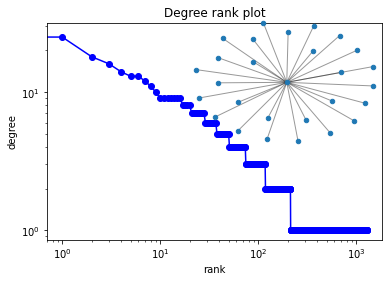

In [7]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print(Gcc)

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()